In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import random
import numpy as np
import os
import pandas as pd
import innvestigate
import matplotlib.pyplot as plt

In [2]:
cnn_attention_gru = load_model('D:\\Downloads\\cnn_attention_gru.h5')

In [3]:
folder_path = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path, header=None)

    dfs.append(df)

combined_data = pd.concat(dfs, ignore_index=True)

# labels_to_eliminate = ['a', 'E', 'F', 'J']

# filtered_data = combined_data[~combined_data.iloc[:, -1].isin(labels_to_eliminate)]

X = combined_data.iloc[:, :-1] 
y = combined_data.iloc[:, -1]

In [4]:
def take256(list_data):
    if len(list_data) > 256:
        list_data = np.array(list_data)
        middle_index = len(list_data) // 2
        middle_data = list_data[middle_index - 128:middle_index + 128]

        list_data = middle_data.reshape(1, 256, 1)
        return list_data
    elif len(list_data) == 256:
        list_data = np.array(list_data)
        list_data = list_data.reshape(1, 256, 1)
        return list_data
    else:
        return "ERROR"

In [146]:
random_number = random.randint(0, 32017)
print(random_number)

18821


In [147]:
list = X.iloc[1000, :].values.flatten().tolist()

In [148]:
input_data = take256(list)

In [149]:
pred = cnn_attention_gru.predict(input_data)
prediction =  np.argmax(pred)
print(prediction)

1/1 [==============================] - 0s 45ms/step
5


In [150]:
# plot_model(cnn_attention_gru, to_file=f'{folder_path}cnn_attention_gru_model.png', show_shapes=True)

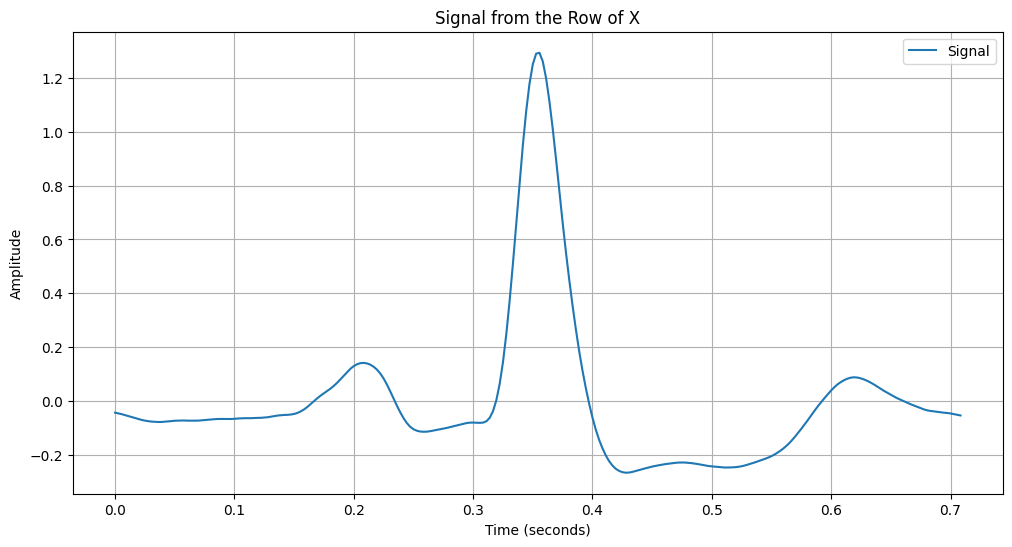

5


In [151]:
input_data_reshaped = input_data.reshape(input_data.shape[1])

fs = 360

# Create a time axis based on the sampling frequency
time_axis = np.arange(0, len(input_data_reshaped)) / fs

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis, input_data_reshaped, label='Signal')
plt.title('Signal from the Row of X')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

print(prediction)

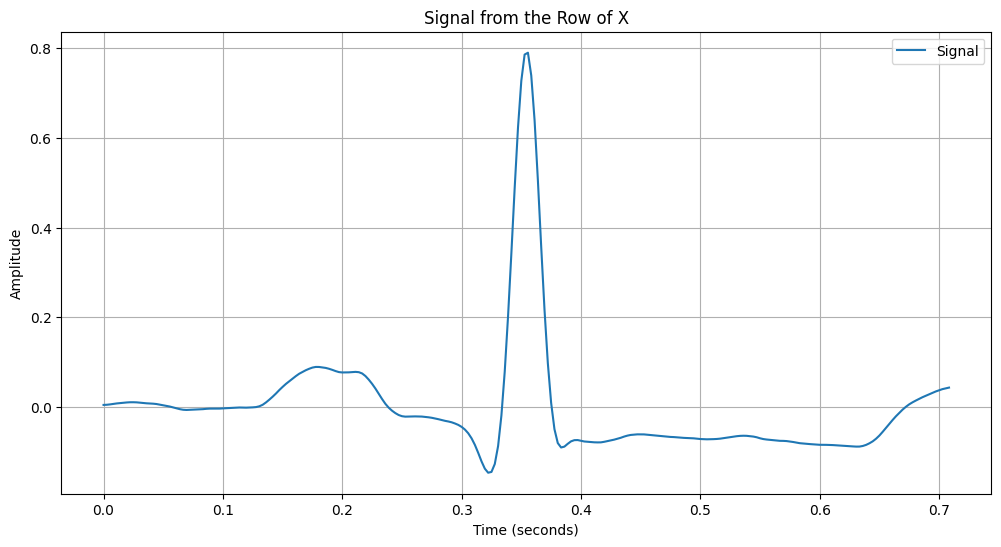

In [152]:
# 0 = ['A']
# 1 = ['E']
# 2 = ['F']
# 3 = ['J']
# 4 = ['L']
# 5 = ['N']
# 6 = ['R']
# 7 = ['V']
# 8 = ['a']

label_row = combined_data[combined_data[256] == "N"].iloc[0]
label_row = label_row.drop(labels=[256])

# Konversi baris menjadi list
label_list = np.array(label_row.tolist())

fs = 360

# Create a time axis based on the sampling frequency
time_axis = np.arange(0, len(label_list)) / fs

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis, label_list, label='Signal')
plt.title('Signal from the Row of X')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
analyzer = innvestigate.create_analyzer('input', cnn_attention_gru)
relevance = analyzer.analyze(input_data)
relevance.shape

(1, 256, 1)

In [154]:
# Ubah ndarray menjadi list
relevance_list = relevance.squeeze().tolist()

# Urutkan list secara menurun
sorted_relevance = sorted(enumerate(relevance_list), key=lambda x: x[1], reverse=True)

# Ambil 50 elemen pertama setelah diurutkan
top_50_relevance = sorted_relevance[:50]

# Buat dictionary dari hasil urutan dengan indeks sebagai kunci dan nilai sebagai nilai
top_50_dict = {index: value for index, value in top_50_relevance}

print(top_50_dict)

{128: 1.2932432889938354, 127: 1.2896459102630615, 129: 1.261432409286499, 126: 1.2502319812774658, 130: 1.1992131471633911, 125: 1.1776546239852905, 131: 1.113932490348816, 124: 1.075791358947754, 132: 1.0120190382003784, 123: 0.9502545595169067, 133: 0.8990850448608398, 122: 0.807982861995697, 134: 0.7805385589599609, 135: 0.6630123853683472, 121: 0.6580579876899719, 136: 0.5522206425666809, 120: 0.5098676085472107, 137: 0.4494900107383728, 119: 0.371166855096817, 138: 0.3541061282157898, 139: 0.26555877923965454, 118: 0.2479761838912964, 140: 0.18466432392597198, 117: 0.14468331634998322, 75: 0.14197923243045807, 74: 0.14113008975982666, 76: 0.14007318019866943, 73: 0.13701555132865906, 77: 0.1353098750114441, 72: 0.13004375994205475, 78: 0.12768931686878204, 71: 0.12031678110361099, 79: 0.11700744181871414, 141: 0.11254517734050751, 70: 0.1081407219171524, 80: 0.1025499477982521, 69: 0.09484212100505829, 223: 0.08857061713933945, 224: 0.08744944632053375, 222: 0.08744652569293976, 

In [155]:
# Filter nilai yang di atas 0.0 dan ambil indeksnya
filtered_indices = [index for index, value in enumerate(relevance_list) if value > 0.0]

print(filtered_indices)

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237]


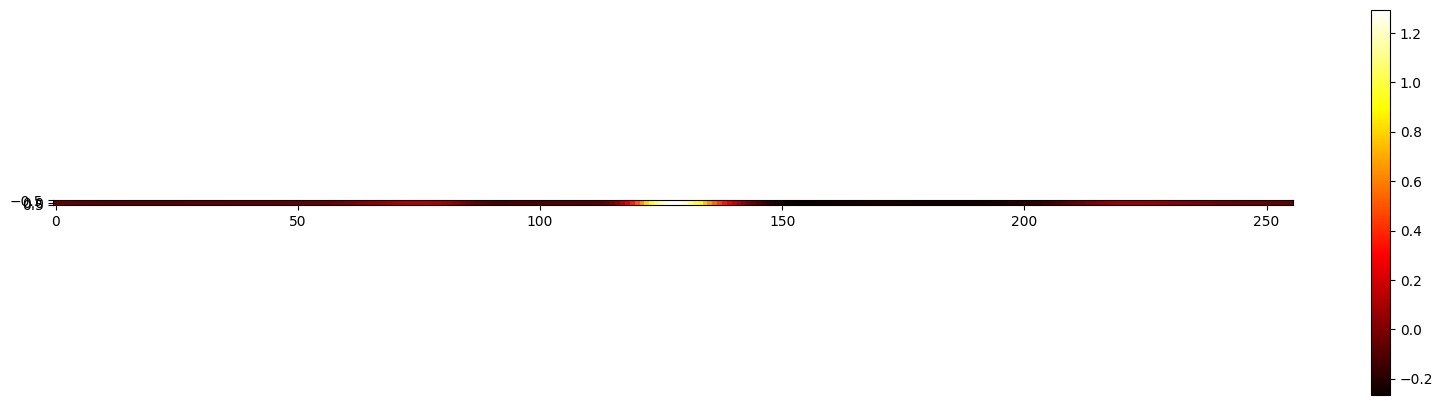

In [156]:
relevance_resized = np.resize(relevance, (1, 256, 1))

plt.figure(figsize=(20, 5))
plt.imshow(relevance_resized, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()